Football Transfers — Age vs Transfer Fee
DSA210 Term Project
Umut Tekinalp

I want to explore whether younger players are transferred for higher fees.  

This dataset contains football transfer records, including:
 / player age
 / transfer fee (millions EUR)
 / player name and other attributes

In [2]:
import os
os.makedirs('data', exist_ok=True)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv(
    'data/premier-league.csv',
    engine='python',
    on_bad_lines='skip'
)

In [5]:
df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country
0,Middlesbrough FC,Tommy Wright,26.0,Left Winger,Leicester,€910Th.,in,Summer,0.91,Premier League,1992,1992/1993,England
1,Middlesbrough FC,Jonathan Gittens,28.0,defence,Southampton,€250Th.,in,Summer,0.25,Premier League,1992,1992/1993,England
2,Middlesbrough FC,Chris Morris,28.0,Right-Back,Celtic,?,in,Summer,NaN,Premier League,1992,1992/1993,England
3,Middlesbrough FC,Ben Roberts,17.0,Goalkeeper,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993,England
4,Middlesbrough FC,Andy Todd,17.0,Centre-Back,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993,England


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23675 entries, 0 to 23674
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           23675 non-null  object 
 1   player_name         23675 non-null  object 
 2   age                 23660 non-null  float64
 3   position            23675 non-null  object 
 4   club_involved_name  23675 non-null  object 
 5   fee                 23671 non-null  object 
 6   transfer_movement   23675 non-null  object 
 7   transfer_period     23675 non-null  object 
 8   fee_cleaned         9040 non-null   float64
 9   league_name         23675 non-null  object 
 10  year                23675 non-null  int64  
 11  season              23675 non-null  object 
 12  country             23675 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [7]:
data = df[["player_name", "age", "fee_cleaned"]].copy()

data = data.dropna(subset=["age", "fee_cleaned"])

median_fee = data["fee_cleaned"].median()
data["high_fee"] = (data["fee_cleaned"] >= median_fee).astype(int)

In [8]:
data[["age", "high_fee"]].describe()

,age,high_fee
count,9035.000000,9035.000000
mean,25.667294,0.502822
std,4.617826,0.500020
min,15.000000,0.000000
25%,22.000000,0.000000
50%,25.000000,1.000000
75%,29.000000,1.000000
max,47.000000,1.000000


In this section, I:

 / examine the distribution of age

 / look at the scales of high-fee vs low-fee transfers

 / visualize the relationship between age and transfer fee

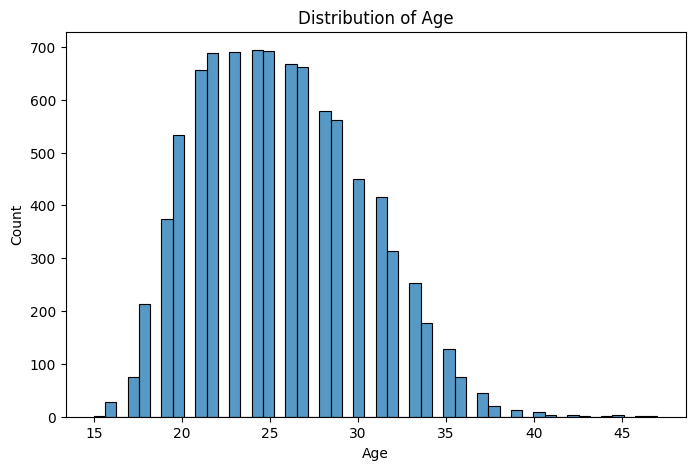

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(data['age'], bins=50)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [10]:
data['high_fee'].value_counts(normalize=True)

,proportion
high_fee,
1,0.502822
0,0.497178


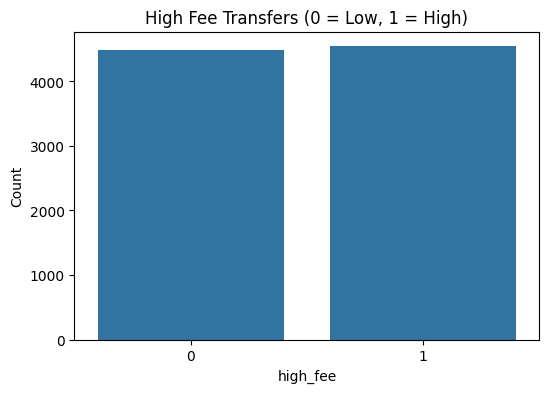

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='high_fee', data=data)
plt.title('High Fee Transfers (0 = Low, 1 = High)')
plt.xlabel('high_fee')
plt.ylabel('Count')
plt.show()

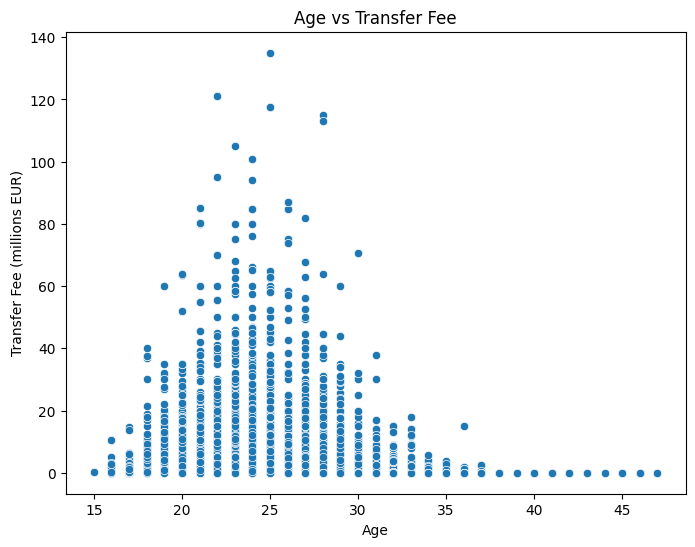

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='fee_cleaned', data=data)
plt.title('Age vs Transfer Fee')
plt.xlabel('Age')
plt.ylabel('Transfer Fee (millions EUR)')
plt.show()

In [13]:
data[["age", "fee_cleaned"]].corr()

,age,fee_cleaned
age,1.00000,-0.10955
fee_cleaned,-0.10955,1.00000


## Hypothesis Test 1

- H0: The average age is the same for high-fee vs low-fee transfers.  
- H1: High-fee transfers have a different  average age.

I will use an independent samples t-test.

In [14]:
young_high = data[data['high_fee'] == 1]['age']
young_low = data[data['high_fee'] == 0]['age']

t_stat, p_val = stats.ttest_ind(young_high, young_low, equal_var=False)

t_stat, p_val

(np.float64(-14.465153772246358), np.float64(8.171620575217254e-47))

- If pvalue < 0.05, I reject H0 and conclude that high-fee transfers are associated with significantly different (typically lower) average age.
- If pvalue >= 0.05, I fail to reject H0 and cannot say there is a significant difference.

## Hypothesis Test 2: Is there a correlation between age and transfer fee?

Here, age is continuous and fee_cleaned is continuous.

- H0: There is no correlation between age and transfer fee.  
- H1: There is a non-zero correlation between age and transfer fee.

In [15]:
corr, p_corr = stats.pearsonr(data['age'], data['fee_cleaned'])
corr, p_corr

(np.float64(-0.10954978761592798), np.float64(1.5775199786116454e-25))

- corr shows the strength and direction of the relationship (closer to 1 or -1 = stronger).
- If pvalue < 0.05, the correlation is statistically significant.

- I loaded and cleaned a football transfers dataset.
- I explored the distribution of age and high-fee labels.
- Scatter plots and descriptive statistics suggest that high-fee transfers may involve different age patterns.
- A t-test was used to compare average age between high-fee vs low-fee transfers.
- A correlation test examined the association between age and transfer fee.